# 决策树模型及小案例

## 决策树算法定义

&emsp;&emsp;决策树算法是一种非参数的决策算法，它根据数据的不同特征进行多层次的分类和判断，最终决策出所需要预测的结果。它既可以解决分类算法，也可以解决回归问题，具有很好的解释能力。

### 决策树原理

1. 原理图

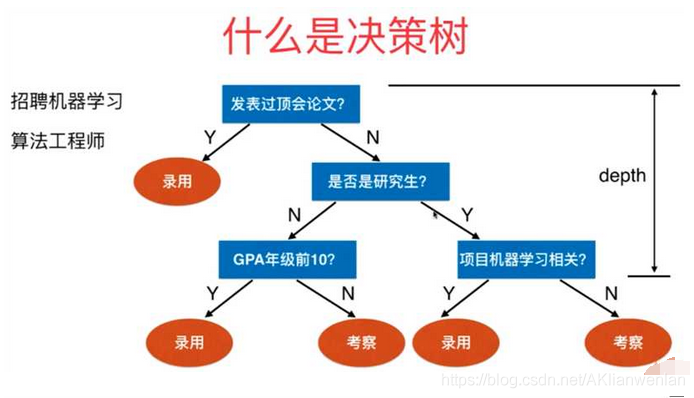

2. 对于决策树的构建方法具有多种出发点,它具有多种构建方式，如何构建决策树的出发点主要在于决策树每一个决策点上需要在哪些维度上进行划分以及在这些维度的哪些阈值节点做划分等细节问题。
3. 信息熵entropy是决策树构建过程中最为常见的一种构建方式，<br /> 熵在信息论中的含义是随机变量的不确定度，熵越大，不确定性越大，越不确定，熵越小，表示不确定度越小，越确定。<br /> 熵在信息论中代表随机变量不确定性的度量。熵越大，代表数据的不确定性越高；反之，熵越小，代表数据的不确定性越低。<br />信息熵的划分方式总体原则是不断地使得整体的决策系统的熵值越来越小，使得系统越来越确定的方向发展。
4. 基尼系数gini是决策树划分的另外一种方式，它和信息熵的原理是类似的，随着基尼系数的增大，整体的随机性在不断地增大。
5. 对于基尼系数和信息熵的决策树划分方式，其效果一般情况下都是大致相同的，只是信息熵的计算方式比起基尼系数要慢一些，sklearn中默认选用的是基尼系数。因此，对于决策树的决策方式信息熵和基尼系数这个超参数对于模型的好坏并没有太大的影响。 一般情况下，entropy是欠拟合的情况下才使用。

## 决策树算法小案例

### 1、数据挖掘流程
&emsp;&emsp;数据读取&emsp;->&emsp;探索性数据分析&emsp;->&emsp;info&emsp;->&emsp;数据清洗&emsp;->&emsp;特征筛选&emsp;->&emsp;数据预处理&emsp;->&emsp;模型构建&emsp;->&emsp;模型评估&emsp;->&emsp;模型部署（生成环境）

### 2、根据流程实现决策树算法

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # 分类决策树
from sklearn.model_selection import train_test_split # 训练集和测试集的划分
from sklearn.model_selection import GridSearchCV   # 网格搜索
from sklearn.model_selection import cross_val_score  # 交叉验证模块
import matplotlib.pyplot as plt

（1）读取数据

In [2]:
data=pd.read_csv("train.csv")
data.head()  
# Survived属性表示的是最终标签，相当于输出的y

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


（2）探索性数据分析

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


（3）数据清洗

&emsp;&emsp;通过查看data数据，发现age和Cabin存在缺失值，其中age用均值来填充，cabin因缺失较多，可直接删除。通过观测判断来说和预测的y没有关系的列（Name,Ticket）也删除。

In [4]:
# 删除字段cabin
data.drop("Cabin", inplace = True, axis = 1)
data.drop("Name", inplace = True, axis = 1)
# 删除字段Ticket
data.drop("Ticket", inplace = True, axis = 1)
# 均值填充
data["Age"] = data["Age"].fillna(data["Age"].mean())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


&emsp;&emsp;字段Embarked字段仅很少部分的缺失值，可直接dropna删除掉只要有缺失值的行，全部字段剩下889条数据。

In [5]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


&emsp;&emsp;Embarked中存在[“S”, “C”, “Q”]3种结果：现将结果转成列表，再从列表中取出对应的索引（数字）

In [6]:
# 将Embarked的不同值的放在一个列表中
labels = data["Embarked"].unique().tolist()

In [7]:
# 将Embarked属性中的["S","Q","C"]转化成 0,1,2
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

&emsp;&emsp;对分类变量Sex也采样相似办法进行转化

In [8]:
# 先获取bool值，再将bool值转成0-1
data["Sex"] =(data["Sex"]=="male").astype("int") 

&emsp;&emsp;看标签是否平衡

In [9]:
# 看标签是否平衡
data.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

（4）特征筛选
&emsp;&emsp;根据某个属性将数据分成特征数据和标签数据（最后的预测值或者输出值）

In [10]:
x = data.iloc[:, data.columns != "Survived"]
y = data.iloc[:, data.columns == "Survived"]

（5）数据预处理

&emsp;&emsp;第一步：划分训练集和测试集

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

&emsp;&emsp;第二步：划分完训练集后会存在索引混乱的情况，需要重新对索引进行排序

In [12]:
for i in [Xtrain, Xtest, ytrain, ytest]:
    # shape属性的第一个元素就是索引的总个数
    i.index = range(i.shape[0])
# 索引恢复正常
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,860,3,1,29.699118,0,0,7.2292,1
1,246,1,1,44.000000,2,0,90.0000,2
2,61,3,1,22.000000,0,0,7.2292,1
3,736,3,1,28.500000,0,0,16.1000,0
4,627,2,1,57.000000,0,0,12.3500,2
...,...,...,...,...,...,...,...,...
617,353,3,1,15.000000,1,1,7.2292,1
618,358,2,0,38.000000,0,0,13.0000,0
619,837,3,1,21.000000,0,0,8.6625,0
620,713,1,1,48.000000,1,0,52.0000,0


（6）建模

In [24]:
clf = DecisionTreeClassifier(random_state = 25)
clf = clf.fit(Xtrain, ytrain)
score = clf.score(Xtest, ytest)
score

0.700374531835206

（7）模型评估

&emsp;&emsp;此案例模型评估方法：交叉验证

In [14]:
clf = DecisionTreeClassifier(random_state=25)
# 10次交叉验证求均值，结果降低
score = cross_val_score(clf, x, y, cv=10).mean()
score

0.7469611848825333

(8) 保存模型

In [28]:
from joblib import dump, load

dump(clf, 'train.joblib')

['train.joblib']

(9) 加载模型

In [29]:
 clf = load('train.joblib') 

0.8166624106230849


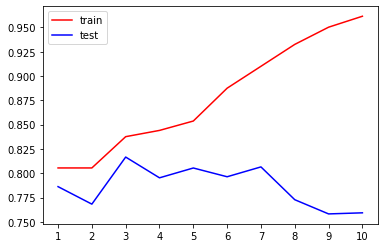

In [15]:
# 两个空列表用来存储训练得到的两个分数
tr = []
te = []
for i in range(10):
    # 实例化模型，设定决策树的最大深度
    clf = DecisionTreeClassifier(random_state = 25, max_depth = i + 1, criterion = "entropy")
    # fit训练过程
    clf = clf.fit(Xtrain, ytrain)
    # 训练集score
    score_tr = clf.score(Xtrain, ytrain)
    # 测试集分数，取均值
    score_te = cross_val_score(clf, x, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
    
print(max(te))
# x,y,颜色，label
plt.plot(range(1,11), tr, color="red", label="train")
plt.plot(range(1,11), te, color="blue", label="test")
# 横坐标范围固定在1-10
plt.xticks(range(1,11))
# 图例
plt.legend()
plt.show()